<a href="https://colab.research.google.com/github/Akshay1781/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly(properly pay); 0 = not delay;, 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [145]:
#Importing all necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 50)



In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Mount the drive and import the dataset

In [147]:
#upgrading the xlrd module to avoid the error in reading excel file
!pip install --upgrade xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Project 3/default of credit card clients.xls',header = 1)

##summary of data

In [149]:
#View the top 5 rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


The head function in Python displays the first five rows of the dataframe by default. It takes in a single parameter: the number of rows. We can use this parameter to display the number of rows of our choice.

In [150]:
#View the bottom 5 rows of the dataset
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


The tail function in Python displays the last five rows of the dataframe by default. It takes in a single parameter: the number of rows. We can use this parameter to display the number of rows of our choice.


In [151]:
#Getting the Shape of the dataset with rows and columns
df.shape 

(30000, 25)

In [152]:
#check for count of missing values in each column
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [153]:
# Check details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values) 30000 entries and 25 coloumns

In [154]:
#Description of the dataset to get insights of the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,4.70e+04,43262.95,40311.40,38871.76,5663.58,5.92e+03,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,6.93e+04,64332.86,60797.16,59554.11,16563.28,2.30e+04,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-1.57e+05,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2.67e+03,2326.75,1763.00,1256.00,1000.00,8.33e+02,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,2.01e+04,19052.00,18104.50,17071.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,6.02e+04,54506.00,50190.50,49198.25,5006.00,5.00e+03,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1.66e+06,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


Describe function is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [155]:
# Number of unique value in the datasets
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [156]:
# removing Id columns
df.drop(columns = 'ID', axis=1, inplace=True)

##**Improper structure and formats**


Improper struture of data is crucial step from analysis perspective. We should look into the fact the datatype assigned is actually correct pertaining to the data or not. Our goal is to make the dataset more readble and clean so we can perfrom EDA with effective appraoch.

In [157]:
# Rename the columns
df.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'payment_status_sept',
                   'PAY_2': 'payment_status_aug',
                   'PAY_3': 'payment_status_jul',
                   'PAY_4': 'payment_status_jun',
                   'PAY_5': 'payment_status_may',
                   'PAY_6': 'payment_status_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'payment_amount_sept',
                   'PAY_AMT2': 'payment_amount_aug',
                   'PAY_AMT3': 'payment_amount_jul',
                   'PAY_AMT4': 'payment_amount_jun',
                   'PAY_AMT5': 'payment_amount_may',
                   'PAY_AMT6': 'payment_amount_apr',
                   'dpnm' : 'default_payment',
                   'default payment next month':'IsDefaulter'}, inplace=True)

In [158]:
df.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'payment_status_sept', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'payment_amount_sept', 'payment_amount_aug', 'payment_amount_jul',
       'payment_amount_jun', 'payment_amount_may', 'payment_amount_apr',
       'IsDefaulter'],
      dtype='object')

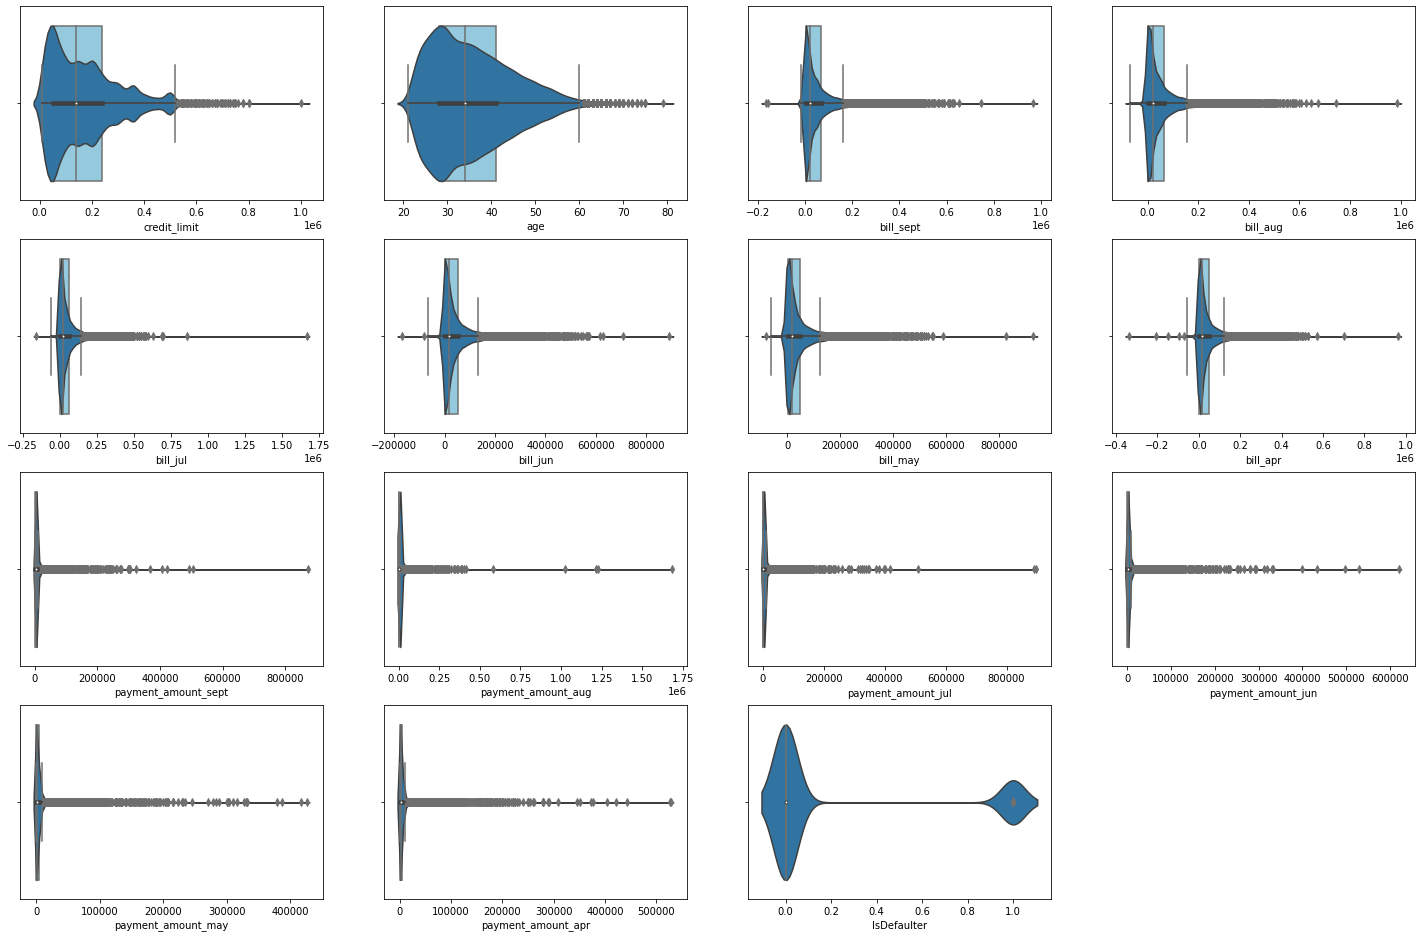

In [159]:
#lets check the distribution of dataset and the if any outliers are present.

#plotting a violin plot for all numerical features
feat = ['credit_limit','age','bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'payment_amount_sept', 'payment_amount_aug', 'payment_amount_jul',
       'payment_amount_jun', 'payment_amount_may', 'payment_amount_apr',
       'IsDefaulter']

plt.figure(figsize=(25,25))
n=1

for column in feat:
  plt.subplot(6,4,n)
  n = n+1
  sns.boxplot(df[column], color ='skyblue' )
  sns.violinplot(df[column])

As we can see, the distribution is close to normal distribution, but we do have many outliers present, which needs to get treated.

##**Data Preprocessing**

It is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

##**gender**

In [160]:
# understanding the distribution of male and female in the dataset
df['gender'].value_counts(normalize = True)

2    0.6
1    0.4
Name: gender, dtype: float64

Most of the credit card users are female which counts to 60% of total data.


##**Education**

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [161]:
#counting the fraction of educational diversity
df['education'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [162]:
combine_df = (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0)
df.loc[combine_df, 'education'] = 4
df['education'].value_counts(normalize = True)

2    0.47
1    0.35
3    0.16
4    0.02
Name: education, dtype: float64

Majority of the users are university students counting to around 47% of total counts.

##**Marriage**
1 = married; 2 = single; 3 = others

In [163]:
#checking marital status 
df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

Only few values are there for class 0, which is not determined also.So I am 
adding them in Others category.



In [164]:
df['marital_status'] = df['marital_status'].map({0:3,1:1,2:2,3:3})
df['marital_status'].value_counts(normalize = True)

2    0.53
1    0.46
3    0.01
Name: marital_status, dtype: float64

Majorly, around 53% of credit card were owned by married customer.


##**payment_status_sept**
-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above

In [165]:
#checking previous month payment status
df['payment_status_sept'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: payment_status_sept, dtype: int64

Since, there are 0,-2 values are also present, but as per our stated description, we know that -1 is paid on time. So, we will merge all these columns to -1.

In [166]:
df['payment_status_sept'] = df['payment_status_sept'].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})  #getting the set of values containing -2,0 by creating condition
df['payment_status_sept'].value_counts(normalize = True)*100 #checking  the percentage of data


-1    77.27
 1    12.29
 2     8.89
 3     1.07
 4     0.25
 5     0.09
 8     0.06
 6     0.04
 7     0.03
Name: payment_status_sept, dtype: float64

around 77% customers paid the september bill on time.



##**payment_status_aug**

In [167]:
df['payment_status_aug'] = df['payment_status_aug'].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})  #getting the set of values containing -2,0 by creating condition
df['payment_status_aug'].value_counts(normalize = True)*100 #checking  the percentage of data

-1    8.52e+01
 2    1.31e+01
 3    1.09e+00
 4    3.30e-01
 1    9.33e-02
 5    8.33e-02
 7    6.67e-02
 6    4.00e-02
 8    3.33e-03
Name: payment_status_aug, dtype: float64

Around 85% customers has paid the bill of august on time.



##**payment_status_jul**

In [168]:
df['payment_status_jul'] = df['payment_status_jul'].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})  #getting the set of values containing -2,0 by creating condition
df['payment_status_jul'].value_counts(normalize = True)*100 #checking  the percentage of dataAround 86% customers had paid july bill on time


-1    85.96
 2    12.73
 3     0.80
 4     0.25
 7     0.09
 6     0.08
 5     0.07
 1     0.01
 8     0.01
Name: payment_status_jul, dtype: float64

Around 86% customers had paid july bill on time


Default_payment_next_month is the dependent variable in our dataset in which 1 = user is user is going to default on his payment & 0 = not default


##**payment_status_jun**

In [169]:
df['payment_status_jun'] = df['payment_status_jun'].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})  #getting the set of values containing -2,0 by creating condition
df['payment_status_jun'].value_counts(normalize = True)*100 #checking  the percentage of data

-1    8.83e+01
 2    1.05e+01
 3    6.00e-01
 4    2.30e-01
 7    1.93e-01
 5    1.17e-01
 6    1.67e-02
 1    6.67e-03
 8    6.67e-03
Name: payment_status_jun, dtype: float64

Around 88% of customers had paid the june bill on time.


##**payment_status_may**

In [170]:
df['payment_status_may'] = df['payment_status_may'].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})  #getting the set of values containing -2,0 by creating condition
df['payment_status_may'].value_counts(normalize = True)*100 #checking  the percentage of data

-1    9.01e+01
 2    8.75e+00
 3    5.93e-01
 4    2.80e-01
 7    1.93e-01
 5    5.67e-02
 6    1.33e-02
 8    3.33e-03
Name: payment_status_may, dtype: float64

Aroung 90% of the customers has the paid the may bill on time.



##**payment_status_apr**

In [171]:
df['payment_status_apr'] = df['payment_status_apr'].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})  #getting the set of values containing -2,0 by creating condition
df['payment_status_apr'].value_counts(normalize = True)*100 #checking  the percentage of data

-1    8.97e+01
 2    9.22e+00
 3    6.13e-01
 4    1.63e-01
 7    1.53e-01
 6    6.33e-02
 5    4.33e-02
 8    6.67e-03
Name: payment_status_apr, dtype: float64

Around 89% of the customers paid duly the april bill.

Overall, around 80% of the customers had paid the previous month bill on time. The defaulter rate was very very less.



# Data Visualization

Data visualization provides a good, organized pictorial representation of the data which makes it easier to understand, observe, analyze

Text(0, 0.5, 'Count')

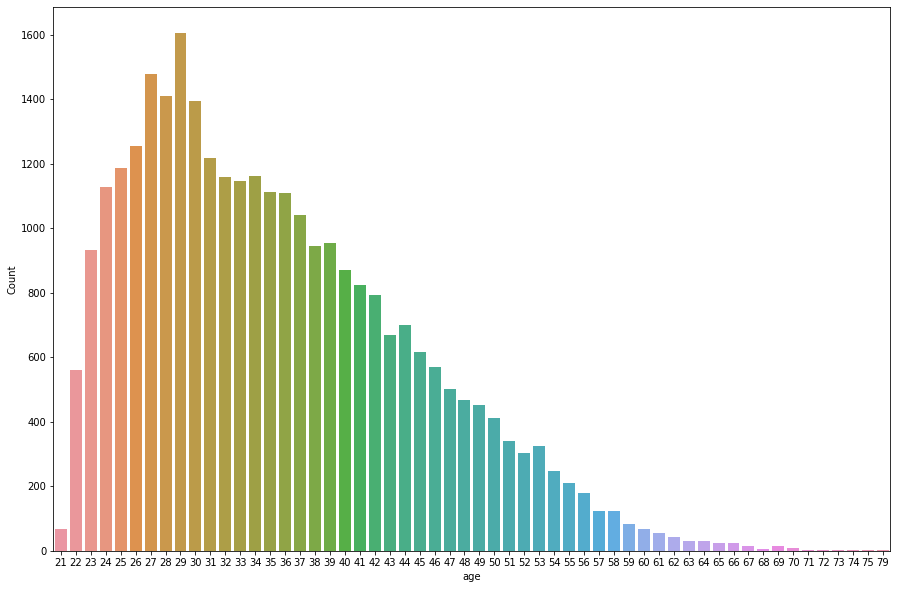

In [223]:
# Analysing based on Age
#df['age'].hist()
plt.figure(figsize = (15,10))
sns.countplot(x = 'age', data =df)
plt.xlabel('age')
plt.ylabel('Count')

Credit Card holders whose age is between 28 to 40 are highest in numbers 

In [173]:
df.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'payment_status_sept', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'payment_amount_sept', 'payment_amount_aug', 'payment_amount_jul',
       'payment_amount_jun', 'payment_amount_may', 'payment_amount_apr',
       'IsDefaulter'],
      dtype='object')

Text(0.5, 1.0, 'Gender vs count')

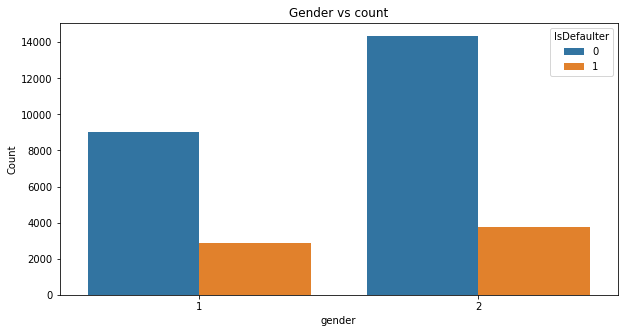

In [174]:
# Analysis based on Gender (1 = male; 2 = female)
plt.figure(figsize=(10,5))
sns.countplot(x = 'gender', hue = 'IsDefaulter', data = df)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Gender vs count')

Females contains more numbers of credit cards as compare to males

Text(0.5, 1.0, 'Default Clients :Default = 1, Not Default = 0')

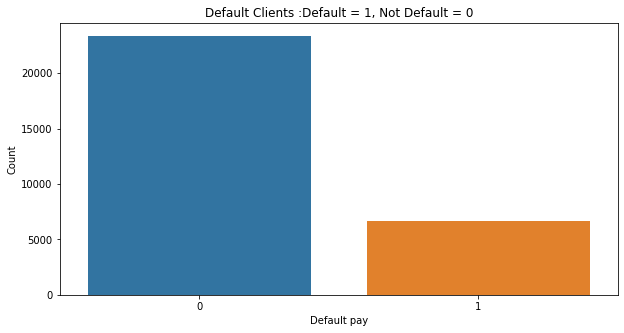

In [175]:
# Numbers of Default and Not Default credit card holders
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)
plt.xlabel('Default pay')
plt.ylabel('Count')
plt.title('Default Clients :Default = 1, Not Default = 0')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'Education v/s Count')

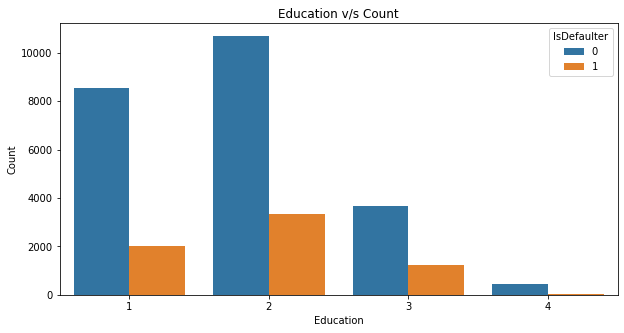

In [176]:
# Analysing on Education Basis (1 = graduate school; 2 = university; 3 = high school; 4 = others)
plt.figure(figsize=(10,5))
sns.countplot(hue = 'IsDefaulter',x = 'education', data = df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education v/s Count')

University has highest numbers of credit card holders followed by Graduate School.

Text(0.5, 1.0, 'Marriage v/s Count')

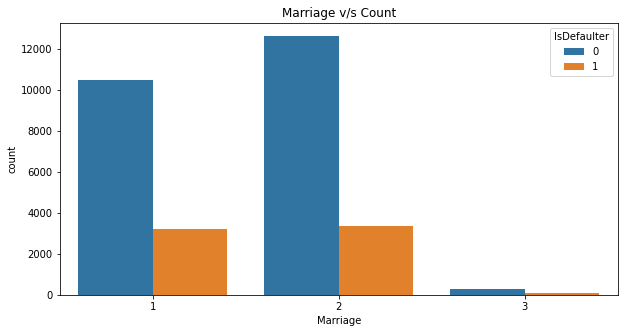

In [177]:
# Analysing on Marriage Basis (1 = married; 2 = single; 3 = others)
plt.figure(figsize=(10,5))
sns.countplot(hue = 'IsDefaulter',x = 'marital_status', data = df)
plt.xlabel('Marriage')
plt.title('Marriage v/s Count')

More number of credit cards holder are Singles followed by Married ones.

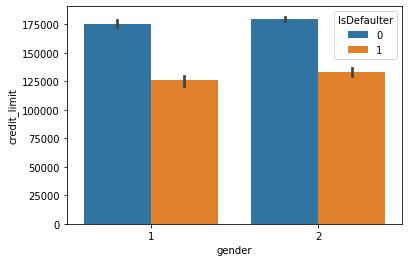

In [178]:
sns.barplot(x='gender',y='credit_limit',data=df,hue='IsDefaulter')

Credit Limit of Male members are less as compare to females.

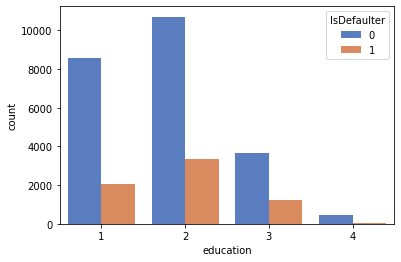

In [179]:
g=sns.countplot(x="education", data=df,hue="IsDefaulter", palette="muted")

From plot it is clear that people from university have more default payment wrt to all other

#Heat Map

 A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

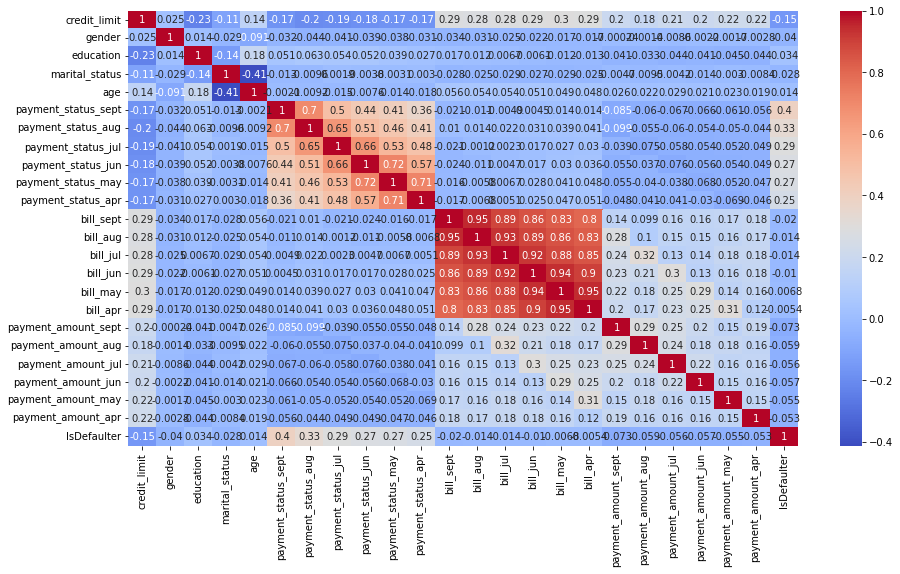

In [180]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

removing the ID columes from the datasets as it is unwanted column.

## Standard Normalization

Normalization refers to rescaling real-valued numeric attributes into a 0

 to 
1
 range.This allows our model to converge to better weights and, in turn, leads to a more accurate model.

In [181]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X = df.iloc[:,0:-1]
X = scaling.fit_transform(X)

In [182]:
X

array([[-1.13672015,  0.81016074,  0.21186989, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.21186989, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.55508562, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [183]:
y = df.iloc[:,-1]

In [184]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: IsDefaulter, Length: 30000, dtype: int64

# Splitting the data in train test split

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(21000, 23)
(9000, 23)


In our datasets there are 3000 observations and 23 columes.

In [186]:
print(y_train.value_counts())

0    16304
1     4696
Name: IsDefaulter, dtype: int64


16304 observations are there in our training datasets which are not default and 4696 observations are there which are default credit card holders.

In [187]:
y_test.value_counts()

0    7060
1    1940
Name: IsDefaulter, dtype: int64

7060 observations are there in our testing datasets which are not default and 1940 observations are there which are default credit card holders.

#Algorithms for machine learning

At its most basic, machine learning uses programmed algorithms that receive and analyse input data to predict output values within an acceptable range. As new data is fed to these algorithms, they learn and optimise their operations to improve performance, developing 'intelligence' over time.

## Logistic Regression

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems

In [188]:
# Importing the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [189]:
# predicting the y test observations
y_pred = logmodel.predict(X_test)

In [190]:
y_train_pred = logmodel.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.81,0.68,0.32,0.43,0.64


In [191]:
# Calculating the Evaluation Matrics for this algorithm
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results   

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.82,0.67,0.29,0.41,0.63


A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [192]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.67      0.29      0.41      1940

    accuracy                           0.82      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.80      0.82      0.79      9000

[[6784  276]
 [1372  568]]


**Hyperparameter Tunning for Logistic Regression**

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins

In [193]:
import warnings
warnings.filterwarnings('ignore')
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log = grid_search_log.fit(X_train,y_train)
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

best_parameters = grid_search_log.best_params_
best_parameters

y_pred_log = grid_search_log.predict(X_test)
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

Accuracy on Cross Validation set : 0.8124761904761904


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.82,0.67,0.29,0.41,0.63


## Using KNN classifier algorithm

The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'

In [194]:
# Importing the KNN Model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [195]:
# predicting the y test observations
y_pred = classifier.predict(X_test)

In [196]:
y_train_pred = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['KNN Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN Classifier,0.84,0.73,0.48,0.58,0.72


In [197]:
# findng all metrics values after using KNN Classifier
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['KNN Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN Classifier,0.79,0.51,0.34,0.41,0.62


In [198]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      7060
           1       0.51      0.34      0.41      1940

    accuracy                           0.79      9000
   macro avg       0.67      0.62      0.64      9000
weighted avg       0.76      0.79      0.77      9000

[[6437  623]
 [1284  656]]


##XGBOOST Classifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework.

In [199]:
# Importing the XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier()

In [200]:
y_train_pred = xgb.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.82,0.7,0.37,0.48,0.66


In [201]:
# findng all metrics values after using XGBoost classfier
y_pred =xgb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.82,0.67,0.36,0.47,0.66


In [202]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.67      0.36      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000

[[6723  337]
 [1241  699]]


##Naive Bayes

Naïve Bayes is one of the fast and easy ML algorithms to predict a class of datasets. It can be used for Binary as well as Multi-class Classifications. It performs well in Multi-class predictions as compared to the other Algorithms.

In [203]:
# Importing the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [204]:
y_pred =naive_bayes.predict(X_test)


In [205]:
y_train_pred = naive_bayes.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.76,0.48,0.57,0.52,0.69


In [206]:
# findng all metrics values after using Naive Bayes Model
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.77,0.47,0.56,0.51,0.69


In [207]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7060
           1       0.47      0.56      0.51      1940

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.77      9000

[[5826 1234]
 [ 857 1083]]


##SVM ALgorithm

Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression.

In [208]:
# import svm model
from sklearn import svm
clf = svm.SVC(kernel='linear') 

# train the model using training set
clf.fit(X_train, y_train)

# predict the response for test datasets 
y_pred = clf.predict(X_test)

In [209]:
y_train_pred = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM,0.79,0.56,0.38,0.45,0.65


In [210]:
# findng all metrics values after using SVM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM,0.8,0.55,0.36,0.43,0.64


In [211]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7060
           1       0.55      0.36      0.43      1940

    accuracy                           0.80      9000
   macro avg       0.70      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000

[[6495  565]
 [1245  695]]


##Decision Tree

 introduction Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

In [212]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [213]:
y_pred = model.predict(X_test)

In [214]:
y_train_pred = model.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,1.0,1.0,1.0,1.0,1.0


In [215]:
# findng all metrics values after using Decision Tree Classifier
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.73,0.39,0.42,0.4,0.62


In [216]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7060
           1       0.39      0.42      0.40      1940

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000

[[5749 1311]
 [1118  822]]


**Decision Tree using Hypertuning**

In [217]:
params = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None],
    "splitter":['best','random'],
    "class_weight" : ['balanced',None],
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10]
}

In [218]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=params, cv=10, n_jobs=-1)

In [219]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [220]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       splitter='random')

In [221]:
grid.best_score_

0.8183333333333334

In [222]:
best_accuracy_1 = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters_2 = grid.best_params_
best_parameters_2
y_pred_dct = grid.predict(X_test)
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

Accuracy on Cross Validation set : 0.8183333333333334


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.82,0.67,0.29,0.41,0.63
1,Decision Tree Tuned,0.82,0.67,0.37,0.48,0.66


**Conclusion:**



*   Using  Logistic Regression classifier we predict 81% accuracy a customer is likely to default next month.
*   Using  K-Nearest Neighbour classifier we predict 78% accuracy a customer is likely to default next month.
*   Using  XGBOOST classifier we predict 82% accuracy whether a customer is likely to default next month.
*   Using  Naive bayes classifier we predict 58% accuracy whether a customer is likely to default next month.  
*   Using  SVM classifier we predict 81% accuracy whether a customer is likely to default next month.
*   Using  Desicion tree classifier we predict 73% accuracy whether a customer is likely to default next month.
*   XGBoost s able to predict 82% accuracy, followed by logistic classifier and svm
*   Marrid, more educated credit ard users, whose age is bet 28 to 40 are likely to default on their payments.
*   Single men less educated  whose age are less than 28 or more than 40 are likely to default on payments.













